C:\Users\Minseok\AppData\Local\Temp\ipykernel_31524\193686820.py:92: UserWarning: frames=<generator object heap_sort at 0x000002151F5C0C70> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, frames=generator, interval=300, repeat=False)


C:\Users\Minseok\anaconda3\Lib\site-packages\matplotlib\animation.py:1719: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


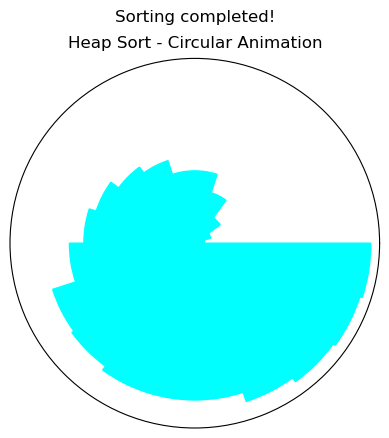

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import random
from IPython.display import HTML

# 무작위 데이터 생성
def generate_data(n=20, max_val=100):
    return [random.randint(1, max_val) for _ in range(n)]
    
# Heap Sort generator
# 힙 정렬(Heap Sort) 함수 정의
def heap_sort(data):
    # 힙 구조를 만드는 함수 (재귀 호출 사용)
    def heapify(data, n, i):
        # 현재 노드를 기준으로 최대 힙을 유지하기 위한 함수
        largest = i  # 현재 노드를 가장 큰 값으로 초기화
        left = 2 * i + 1  # 현재 노드의 왼쪽 자식 인덱스
        right = 2 * i + 2  # 현재 노드의 오른쪽 자식 인덱스

        # 왼쪽 자식이 존재하고, 현재 largest보다 값이 클 경우 largest 갱신
        if left < n and data[left] > data[largest]:
            largest = left

        # 오른쪽 자식이 존재하고, 현재 largest보다 값이 클 경우 largest 갱신
        if right < n and data[right] > data[largest]:
            largest = right

        # 가장 큰 값이 현재 노드가 아닌 경우, 값을 교환하고 힙 정렬 반복
        if largest != i:
            # 현재 노드와 가장 큰 값인 자식 노드 교환
            data[i], data[largest] = data[largest], data[i]
            yield data, largest, i, "Swapping root and child"  # 스왑 상태 반환 (애니메이션용)
            yield from heapify(data, n, largest)  # 가장 큰 값이 이동한 자식 노드에서 다시 힙 정렬 수행

    n = len(data)  # 데이터의 크기 (노드 개수)

    # 힙 구조 생성 단계: 최대 힙을 구성
    # 마지막 부모 노드부터 시작하여 모든 노드를 최대 힙으로 재구성
    for i in range(n // 2 - 1, -1, -1):
        yield from heapify(data, n, i)  # 힙 정렬을 각 부모 노드에 대해 수행
        yield data, -1, -1, f"Heapify at index {i}"  # 현재 힙 상태 반환 (애니메이션용)

    # 정렬 단계: 힙에서 가장 큰 값을 끝으로 이동하여 정렬
    for i in range(n - 1, 0, -1):
        # 루트 노드와 마지막 노드 교환
        data[0], data[i] = data[i], data[0]
        yield data, 0, i, "Swapping root with last element"  # 현재 스왑 상태 반환 (애니메이션용)
        # 남은 힙 영역에 대해 최대 힙 유지
        yield from heapify(data, i, 0)
        yield data, -1, -1, f"Heapify remaining heap size {i}"  # 현재 힙 상태 반환 (애니메이션용)

    # 정렬 완료 상태 반환
    yield data, -1, -1, "Sorting completed!"  # 모든 정렬 작업 완료


# 데이터 생성
data = generate_data()

# 시각화 준비
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
angles = np.linspace(0, 2 * np.pi, len(data), endpoint=False)
bars = ax.bar(angles, data, width=2 * np.pi / len(data), align='edge', color='limegreen')
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Heap Sort - Circular Animation", va='bottom')

# 상태 텍스트 추가
status_text = ax.text(0.5, 1.1, "", transform=ax.transAxes, ha="center", fontsize=12)

# 업데이트 함수
def update(frame):
    current_data, idx1, idx2, status = frame
    for idx, (bar, value) in enumerate(zip(bars, current_data)):
        bar.set_height(value)
        if idx == idx1:  # 현재 선택된 요소
            bar.set_color("yellow")
        elif idx == idx2:  # 스왑 대상 요소
            bar.set_color("red")
        else:
            bar.set_color("limegreen")

    status_text.set_text(status)  # 현재 상태 텍스트 업데이트

    # 정렬 완료 상태 표시
    if status == "Sorting completed!":
        for bar in bars:
            bar.set_color("cyan")

# 애니메이션 실행
generator = heap_sort(data[:])
ani = FuncAnimation(fig, update, frames=generator, interval=300, repeat=False)

# 애니메이션 출력
HTML(ani.to_html5_video())
